<center>
<h1> <b>Métodos numéricos</b> </h1>
<h3> <b>Segundo cuatrimestre 2021</b> </h3>
<br>
<h1> <b>Práctica 5: Ecuaciones elípticas</b> </h1>
<h3> Cátedra: Pablo Dmitruk </h3>
<br>
<h3> Fecha límite de entrega: 5 de noviembre de 2021 23:59 </h3>
</center>

### Entrega de:   **COMPLETAR CON SUS NOMBRES**

- [Ejercicios](#ejercicios)

- [Apunte](#explicacion)

- [Funciones útiles](#funciones)

<a name="ejercicios"></a>

# **Ejercicios**

## **Problema 1: Ecuación de Poisson 1D con contornos**

El objetivo de este ejercicio es construir una función `poisson_1d` que permita resolver la ecuación de Poisson 1D en el dominio $x \in [0, L_x]$ con condiciones de contorno de Dirichlet, o una condición de Neumann en un extremo y de Dirichlet en el otro:
\begin{equation*}
    \frac{\mathrm d^2 h}{\mathrm d x^2} = f(x), \qquad \qquad \left[ h(0) = a \lor h'(0) = -a \right] \qquad \wedge \qquad \left[ h(L_x) = b \lor h'(L_x) = b \right],
\end{equation*}
donde la primer opción para cada contorno corresponde a una condición de Dirichlet (i.e. se prescribe el valor de la función) y la segunda a una condición de Neumann (i.e. se prescribe el valor de la derivada normal al extremo, $-\mathrm{d}/\mathrm{d} x$ en $x_0$ y $\mathrm{d}/\mathrm{d} x$ en $x_{L_x}$, considerando normal exterior). Noten que en caso de prescribir condiciones de Neumann en ambos extremos, el problema ya no presenta solución única, debiendo especificarse algún parametro extra (por ejemplo el valor medio) para tener solución única. El tratamiento de un caso análogo a este último se difiere hasta el Problema 3.

Para ello, deben utilizar la estrategia mencionada en el apunte para construir una matriz $\breve{\mathbb D}_{xx}$ que contenga estimadores de las condiciones de contorno en la primer y última fila, mientras que  en las filas restantes deben incorporar la matriz de diferenciación apropiada. Luego, la solución al problema discreto se obtiene al resolver:
\begin{equation*}
    \breve{\mathbb D}_{xx} \mathbf h = \mathbf f,
\end{equation*}
donde $\mathbf h$ es la solución discreta, que incluye los valores en los contornos en la primer y última fila, mientras que $\mathbf f$ contiene al forzado $f$ en los puntos interiores y a las condiciones de contorno en sus extremos.

Consideraremos el dominio $L_x = 1$ y $N_x=35$ puntos de grilla. Les adjuntamos un esqueleto de una función que realiza esta tarea. Deberán completar este esqueleto y validar sus resultados resolviendo los siguientes problemas con distintos órdenes de precisión (pares):

$\bf \text{a)}$ Una varilla térmicamente conductora cuyos extremos se mantienen a temperatura fija $T_0 = 3$ y $T_{L_x}=4$. La solución analítica en este caso es 
\begin{equation*}
    T(x) = (T_{L_x} - T_0)x + T_0.
\end{equation*}

$\bf \text{b)}$ El potencial electrostático $\phi$ asociado a una partícula de carga $Q=1$ ubicada en el punto $x_Q = 1/2$ de un medio vacío, y donde los extremos del dominio posen terminaciones conductoras conectadas a tierra. En un espacio 1-dimensional, considerando unidades de $\epsilon_0 = 1$, este problema tiene como solución analítica
\begin{equation*}
    \phi(x) = \frac{Q}{2} (x_Q - |x - x_Q|).
\end{equation*}
_Ayuda: recuerde que en el problema discreto una carga puntual tiene un ancho asociado $\Delta x$._

$\bf \text{c)}$ Una varilla térmicamente conductora cuyo extremo izquierdo se mantiene a $T=0$ y el derecho a $T = 10^{-2}$. Además la varilla se halla en presencia de un forzado térmico dado por $f(x) = x$. Este problema admite como solución a
\begin{equation*}
    T(x) = \frac{x}{6} \left[ x^2 + (6 \times 10^{-2} - 1 )\right].
\end{equation*}

$\bf \text{d)}$ Una varilla térmicamente conductora cuyo extremo izquierdo se mantiene a $T=0$ mientras que sobre el derecho se coloca un aislante térmico. Nuevamente, la varilla se halla en presencia de un forzado térmico dado por $f(x) = x$. Este problema admite como solución a
\begin{equation*}
    T(x) = \frac{x}{2} \left[ \frac{x^2}{3} - 1 \right].
\end{equation*}

_Nota: Utilice un tratamiento denso para la matriz $\tilde{\mathbb D}_{xx}$ por el momento, más adelante nos ocuparemos de la eficiencia computacional._

_Sugerencia: Si tiene problemas con la construcción de $\tilde{\mathbb D}_{xx}$, baje temporalmente la resolución a $N_x=4$ y el orden a $2$ de forma de poder visualizar mejor la construcción de la misma._

**Su resolución acá**

In [ ]:
# Su resolución acá

# Instalar findiff si no está instalado
!if ! pip list | grep findiff >> /dev/null; then pip install findiff; fi

def poisson_1d(f, cc, tipo_cc, dx, orden=2):
    """
        Resuelve la ecuación de Poisson 1D para condiciones de Dirichlet o
    Neumann, incluyendo los contornos.

    Entrada:
        - `f`:       Vector de nx puntos con el forzado (i.e. las fuentes).
        - `cc`:      Arreglo de dos elementos con los valores de las condiciones
                    de contorno.
        - `tipo_cc`: Lista de dos strings con el tipo de condición sobre cada
                    contorno. "D" denota tipo Dirichlet, "N" tipo Neumann.
        - `dx`:      Espaciamiento entre puntos.
        - `orden`:   Orden de precisión en los operadores. (OPCIONAL)
    
    Devuelve:
        - `h`:       Vector de NX puntos con la solución en todo punto
                    (incluídos) los contornos.
    """

# --------------------------------------------------------------------------
#        COMPLETAR: Crear una matriz A de nx x nx que tenga operadores
#        diferenciales para la derivada segunda en las filas intermedias.
# --------------------------------------------------------------------------

    # Reporto un error si se pidió Neumann en ambos extremos
    if tipo_cc[0] == tipo_cc[1] and tipo_cc[0] = "N":
        raise ValueError("Condiciones de Neumann en ambos extremos no está "
        "implementado.")
    
    # Trato el primer contorno en Dxx
    if tipo_cc[0] == "D":
        pass
#        COMPLETAR: Considerar Dirichlet en el extremo izquierdo
    elif tipo_cc[0] == "N":
        pass
#        COMPLETAR:: Considerar Neumann en el extremo izquierdo

    # Trato el segudo contorno en Dxx
    if tipo_cc[1] == "D":
        pass
#        COMPLETAR: Considerar Dirichlet en el extremo derecho
    elif tipo_cc[1] == "N":
        pass
#        COMPLETAR: Considerar Neumann en el extremo derecho

#    COMPLETAR: Agregar las condiciones de contorno a f

#    COMPLETAR: Resolver para h

    return h

---

## **Problema 2: Estudio de convergencia para problemas multiescala**

Considere ahora la ecuación de Poisson 1D con condiciones de contorno mixtas en el dominio $x \in [0, 1]$:
\begin{equation*}
    \frac{\partial^2 T}{\partial x^2} = \mathrm{sen}(kx), \qquad \qquad T(0)=0, \qquad T'(1) = 10^{-2}.
\end{equation*}
Este problema tiene como solución analítica a
\begin{equation*}
    T(x) = - \frac{\mathrm{sen}(kx)}{k^2} + \left(10^{-2} + \frac{\cos(k)}{k} \right) x.
\end{equation*}

Utilizando esta información y la función `poisson_1d` escrita en el problema anterior, estudie la convergencia al resolver este problema para las resoluciones espaciales dadas por $N_x \in \{32, 64, 128, 256, 512 \}$ y para los órdenes $2$, $4$, y $6$. Considere en particular los siguientes escenarios:

$\bf \text{a)}$ $k = 4$;

$\bf \text{b)}$ $k = 8$;

$\bf \text{c)}$ $k = 16$.

**Discuta los resultados hallados**. ¿Qué sucede, a resolución fija, con el valor absoluto del error a medida que aumenta $k$?

_Nota: Por estudio de convergencia nos referimos a la práctica usual de resolver el problema para una cierta resolución y orden y obtener un error asociado, evaluando alguna norma para la diferencia entre la solución numérica y la exacta. Como siempre, le recomendamos usar la norma infinito, aunque cualquier otra norma sirve para este propósito. **Grafique rectas estimativas de la tasa de convergencia que concluye para cada orden utilizado.**_

_Ignore la pérdida de convergencia que puede aparecer a altas resoluciones debida a la aritmética de precisión finita._

In [ ]:
# Su resolución acá

---

## **Problema 3: Ecuación de Poisson 1D periódica**

En este ejercicio buscamos resolver la ecuación de Poisson en el escenario que a priori resulta el más sencillo imaginable, i.e., con condiciones de contorno periódicas: 
\begin{equation*}
    \frac{\mathrm d^2 h}{\mathrm d x^2} = \sin(kx) = f(x), \qquad \qquad h^{(n)}(0) = h^{(n)}(L_x),
\end{equation*}
donde $^{(n)}$ representa una cantidad apropiada de derivadas ($n=0$ corresponde a la propia función). Sin embargo, este problema está mal formulado, **ya que queda definido a menos de una constante** (sumar una constante sigue verificando periodicidad y no modifica la derivada segunda). Para garantizar una solución única, es necesario especificar otra característica de la solución, siendo lo más frecuente especificar el valor medio de la misma. **Consideramos en este problema el caso donde dicho valor medio es nulo.** 

Reparen además que en ausencia de un forzado (i.e. de fuentes) la ecuación de Poisson en un recinto periódico solo admite solución trivial (una constante). Es por ello que en este problema deberán resolver con un forzado $f(x) = \mathrm{sen}(kx)$.

Recuerden que la manera más sencilla de formular este problema con las herramientas vistas hasta ahora en el curso es expresar el problema discreto como
\begin{equation*}
    \mathbb{D}_{xx} \mathbf h = \mathbf f, \tag{1}
\end{equation*}
y resolver para $\mathbf h$. Sin embargo, esto no impone ninguna condición sobre el valor medio de $\mathbf h$, y por lo tanto la matriz $\mathbb{D}_{xx}$ será singular (el sistema está indeterminado). Si bien hay maneras más formales de resolver este problema modificando la ecuación (1), una muy sencilla y conceptualmente simple es utilizando [`scipy.sparse.linalg.lsqr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html), ya que se puede probar que para un sistema indeterminado cuadrados minimos converge a la solución con menor norma (minimizar $||\mathbf h||$ es equivalente a obtener la solución con valor medio nulo). Utilizando estos conceptos:

$\bf \text{a)}$ escriba un código que resuelva la ecuación de Poisson propuesta para $k=8$ en el dominio $x \in [0, 2\pi)$. Utilice un orden de aproximación de su elección para la derivada segunda;

$\bf \text{b)}$ sabiendo que el problema continuo posee la siguiente solución analítica:
\begin{equation*}
    h(x) = - \frac{\mathrm {sen}(kx)}{k^2},
\end{equation*}
verifique que obtiene el orden de convergencia esperable a priori (utilice, por ejemplo, $N_x \in \{32, 64, 128, 256 \}$ para este propósito).

<br>

_Nota: Recuerde que puede utilizar la función proporcionada `diferenciacion_centrada_periodica` para construir la estimadores de la derivada para ordenes $2$, $4$, $6$ y $8$._

In [ ]:
# Su resolución acá

---

## **Problema 4: Ecuación de Poisson 2D periódica**

Nos concentramos ahora en la ecuación de Poisson 2D con condiciones de contorno periódicas:
\begin{equation*}
    \nabla^2 h(x,y) = f(x,y), \qquad \qquad h^{(n)}(0, y) = h^{(n)}(L_x, y) \qquad \wedge \qquad h^{(n)}(x, 0) = h^{(n)}(x, L_y).
\end{equation*}
Nuevamente, este problema no posee solución única, teniendo $h$ un grado de libertad restante. Como en el ejercicio anterior, vamos a considerar $\langle h \rangle = 0$ (i.e. valor medio nulo) y por lo tanto nuestra solución podrá obtenerse como aquella que optimiza el problema de cuadrados mínimos.

$\bf \text{a)}$ Escriba una función `poisson_2d_periodico` que reciba como argumento un arreglo bidimensional $\mathbb F$ con la distribución de fuentes (i.e. con la discretización de $f$), el espaciamiento de grilla en cada dirección (i.e. $\Delta x$ y $\Delta y$) y el orden de aproximación (con valor por defecto igual a 2). _Ayuda: además de `diferenciacion_centrada_periodica` puede serle de utilidad la función `operador_arreglo_aplanado`_.

Vamos ahora a verificar el funcionamiento de `poisson_2d_periodico` para $(x,y) \in [0, 2\pi) \times [0, 2\pi)$, con $N_x = N_y = 128$ puntos de grilla. Considere el siguiente forzado
\begin{equation*}
    f(x,y) = \mathrm{sen} (k_x x) + \mathrm{sen} (k_y y),
\end{equation*}
que conlleva la siguiente solución analítica
\begin{equation*}
    h(x,y) = - \left( \frac{\mathrm{sen}(k_x x)}{k_x^2} + \frac{\mathrm{sen}(k_y y)}{k_y^2} \right).
\end{equation*}
Note que en los casos particulares $k_x = 0$ o $k_y = 0$ deberá ignorar la respectiva parte de la solución analítica.

$\bf \text{b)}$ Analice los casos $(k_x,k_y) = (6,0)$ y luego $(k_x, k_y) = (0, 2)$, verificando que obtiene las soluciones esperadas al problema 1D con simetría de traslación en la dirección dada por el valor nulo de $k$.

$\bf \text{c)}$ Considere ahora $(k_x, k_y) = (6,2)$ y verifique que obtiene la superposición de los dos problemas anteriores.

$\bf \text{d)}$ Repita ahora el inciso $\bf \text{c)}$ pero para $(x,y) \in [0, 2\pi) \times [0, 4\pi)$, con $N_x = 256$, $N_y = 128$, para operadores espaciales de 8vo orden debería obtener un error de orden $10^{-9}$ y un resultado consistente con la siguiente figura:

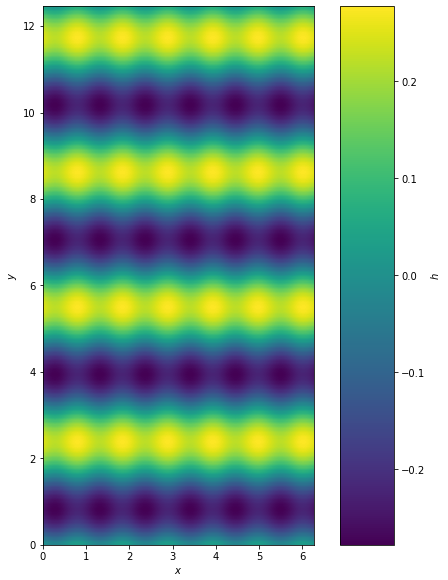

In [ ]:
# Su resolución acá

---

## **Problema 5: Ecuación de Poisson 2D con contornos _(OPCIONAL)_**

$\bf \text{a)}$ Escriba una función `poisson_2d` que permita integrar la ecuación de Poisson bidimensional con condiciones de contorno de tipo Dirichlet o Neumann en cualquiera de sus extremos.

$\bf \text{b)}$ Valide `poisson_2d` con un problema físico de su elección. Un ejemplo, de muchos posibles, es el de un hilo cargado rodeado por contornos conductores. Si considera este ejemplo, considere que los contornos se hallan a un potencial distinto de cero (por ser conductores deben ser equipotenciales), de manera de validar correctamente el álgebra asociada a los contornos. Verifique que, al menos de manera cualitativa, obtiene una solución consistente con su conocimiento físico sobre el problema.

In [ ]:
# Su resolución aquí

---

## **Problema 6: Ecuación de Navier-Stokes**

El último objetivo de esta guía de ejercicios es el de generar un código que resuelva la ecuación de Navier-Stokes incompresible 2D sin forzado:
\begin{align*}
    \frac{\partial \boldsymbol{v}}{\partial t} + (\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol v &=  - \boldsymbol \nabla p + \nu \nabla^2 \boldsymbol v,\\
    \boldsymbol \nabla \cdot \boldsymbol v &= 0,
\end{align*}
con condiciones de contorno periódicas en un dominio cartesiano. $\boldsymbol v = v_x(x,y) \boldsymbol{\hat{x}} + v_y(x,y) \boldsymbol{\hat{y}}$ es el campo de velocidades, $p$ el campo de presiones, $\nu$ la viscosidad cinemática  (considerada constante) y asumimos que la densidad es igual a $1$ por simplicidad.

Para realizar esta tarea utilizaremos todos los contenidos aprendidos hasta ahora en la materia. Les proponemos a continuación una construcción incremental donde en cada paso estaremos resolviendo una parte de nuestro problema. Vale remarcar que la resolución numérica eficiente de la ecuación de Navier-Stokes continua siendo un tópico de investigación activa. Este ejercicio busca implementar la solución más sencilla posible y no la más eficiente ni precisa.

### **Advección de momento**

Lo primero que vamos a implementar es la advección de momento, dada por el término
\begin{equation*}
    (\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol v = \left[v_x \frac{\partial v_x}{\partial x} + v_y \frac{\partial v_x }{\partial y} \right] \boldsymbol{\hat{x}} + \left[v_x \frac{\partial v_y}{\partial x} + v_y \frac{\partial v_y }{\partial y} \right] \boldsymbol{\hat{y}}.
\end{equation*}
Para ello vamos a utilizar diferencias finitas centradas de orden ajustable. Adicionalmente, dado que las matrices de diferenciación serán las mismas para toda la integración, vamos a generarlas una única vez. Luego nuestra función encargada de estimar el término advectivo deberá recibir un diccionario con estas matrices.

Escribamos primero una función `inicializar_matrices` que se encargará de generar todos los operadores necesarios. Por ahora alcanza con implementar los operadores para la derivada primera, en caso que no lo hayan ya adivinado, verán más adelante la utilidad de las demás ramas de la función.

In [ ]:
def inicializar_operadores(nx, ny, dx, dy, tipo=None, precision=2):
    """
        Inicializa operadores de interés para la evolución temporal de la
    ecuación de Navier-Stokes.

    Entrada:
        -`nx`:   Cantidad de puntos de la primer dimensión de los arreglos 
                    sobre los cuales se utilizarán los operadores resultantes.
        -`ny`:   Cantidad de puntos de laa segunda dimensión de los arreglos
                    sobre los cuales se utilizarán los operadores resultantes.
        -`dx`:   Espaciamiento entre puntos a lo largo de la primer dimensión.
        -`dy`:   Espaciamiento entre puntos a lo largo de la segunda dimensión.
        -`tipo`: Tipo de operadores a generar:
            - "primera":    Devuelve operadores que estiman la derivada primera.
            - "segunda":    Devuelve operadores que estiman la derivada segunda.
            - "laplaciano": Devuelve un operador de utilidad para resolver una
                        ecuación de Poisson.
        -`precision`: Orden de precisión a utilizar en la generación de los
                    operadores.
    
    Salida:
        - Operador y/o operadores de interés.
    """
    import scipy.sparse.linalg
    import scipy.sparse as spsparse

    if tipo is None:
        raise ValueError("inicializar_matriz precisa que se especifique el"
                         "tipo de operador a generar: `primera`, `segunda` o "
                         "`aplaciano`.")
    
    if tipo == "primera":
        # COMPLETAR: Genere operadores del orden requerido.
        return # Devolver operadores para las derivadas primeras en x e y.

    if tipo == "segunda":
        # COMPLETAR: Genere operadores del orden requerido.
        return # Devolver operadores para las derivadas segundas en x e y.

    if tipo == "laplaciano":
        # COMPLETAR: Genere operadores del orden requerido.
        return # Devolver un operador precomputado para invertir el laplaciano.

Luego de implemetar en `inicializar_operadores` la funcionalidad necesaria para estimar la derivada primera, escribamos ahora una función `ns_adveccion` que calcule las componentes $\boldsymbol{\hat x}$ e $\boldsymbol{\hat y}$ del término advectivo $(\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol v$.  Asuma que en `Ds["x"]` existe un estimador de la derivada primera con respecto a $x$ y en `Ds["y"]` un estimador de la derivada primera con respecto a $y$.

In [ ]:
import numpy as np

def ns_adveccion(vx, vy, Ds):
    """
        Estima el término advectivo (no-lineal) de la ecuación de Navier-Stokes
    (v·∇)v.

    Entrada:
        - `vx`: arreglo (nx,ny) con la componente x del campo de velocidades.
        - `vy`: arreglo (nx,ny) con la componente y del campo de velocidades.
        - `Ds`: diccionario con operadores de diferenciación.
    
    Salida:
        - `advx`: arreglo (nx,ny) con la componente x del término advectivo.
        - `advy`: arreglo (nx,ny) con la componente y del término advectivo.
    """
    if not isinstance(Ds, dict):
        raise ValueError("Ds debe ser un diccionario de matrices de "
                         "diferenciación.")
    
    if ("x" not in Ds.keys()) or ("y" not in Ds.keys()):
        raise ValueError("Para calcular la advección se requieren matrices "
                            "para la derivada primera con respecto a x e y.")

    # COMPLETAR: estimar la advección del campo de velocidades

    return # Devolver las componentes x e y de la advección de v

Pueden utilizar el código inferior para descartar una buena cantidad de errores comunes en su implementación de `ns_adveccion`. Deberían obtener errores de órden $10^{-3}$, $10^{-5}$, $10^{-7}$, $10^{-9}$ para órdenes de aproximación $2$, $4$, $6$ y $8$, respectivamente.

In [ ]:
# Script para testear la función ns_adveccion
x, dx  = np.linspace(0, 2*np.pi,  32, endpoint=False, retstep=True)
y, dy  = np.linspace(0, 4*np.pi, 128, endpoint=False, retstep=True)

for ord in range(2, 10, 2):
    Dx, Dy = inicializar_operadores(32, 128, dx, dy,
                                    tipo="primera", precision=ord)
    Ds = {"x": Dx, "y": Dy}

    f_x =    np.sin(x[:,None])*np.cos(y[None,:])
    f_y =  - np.cos(x[:,None])*np.sin(y[None,:])

    adv_x, adv_y = ns_adveccion(f_x, f_y, Ds)

    exacta_x = np.sin(2*x[:,None])/2
    exacta_y = np.sin(2*y[None,:])/2

    print(f"Error para orden {ord}:")
    print(f" Máx. error en el término en x: {np.max(np.abs(adv_x - exacta_x))}")
    print(f" Máx. error en el término en y: {np.max(np.abs(adv_y - exacta_y))}")
    print()

del(x); del(y); del(dx); del(dy); del(ord); del(Ds); del(Dx); del(Dy)
del(f_x); del(f_y); del(adv_x); del(adv_y); del(exacta_x); del(exacta_y)

Cómo comentario adicional, noten como el término no-lineal opera transfiriendo energía de un modo con una escala característica $k$ a uno con $2k$. Esta transferencia hacia escalas más chicas se encuentra íntimamente relacionada con el caos espacio-temporal propio de lo que se suele denominar _turbulencia_.

### **Difusión de momento**

Implementemos ahora un estimador para la difusión de momento, proporcional a $\nabla^2 \boldsymbol v$. Para ello deberán volver a la definición de `inicializar_operadores` e implementar la funcionalidad requerida. Luego deberán implementar una función `ns_difusion` que estime el laplaciano del campo de velocidades. Asuma que en `Ds["xx"]` existe un estimador de la derivada segunda con respecto a $x$ y en `Ds["yy"]` un estimador de la derivada segunda con respecto a $y$.

In [ ]:
import numpy as np

def ns_difusion(vx, vy, Ds):
    """
        Estima el término difusivo de la ecuación de Navier-Stokes ∇²v.

    Entrada:
        - `vx`: arreglo (nx,ny) con la componente x del campo de velocidades.
        - `vy`: arreglo (nx,ny) con la componente y del campo de velocidades.
        - `Ds`: diccionario con operadores de diferenciación.
    
    Salida:
        - `difx`: arreglo (nx,ny) con la componente x del término difusivo.
        - `dify`: arreglo (nx,ny) con la componente y del término difusivo.
    """
    if not isinstance(Ds, dict):
        raise ValueError("Ds debe ser un diccionario de matrices de "
                         "diferenciación.")
    
    if ("xx" not in Ds.keys()) or ("yy" not in Ds.keys()):
        raise ValueError("Para calcular la difusión se requieren matrices "
                            "para la derivada segunda con respecto a x e y.")
    
    # COMPLETAR: estimar el laplaciano del campo de velocidades

    return # Devolver las componentes x e y del laplaciano de v

Pueden utilizar el código inferior para descartar una buena cantidad de errores comunes en su implementación de `ns_difusion`. Deberían obtener errores de órden $10^{-3}$, $10^{-5}$, $10^{-7}$, $10^{-10}$ para órdenes de aproximación $2$, $4$, $6$ y $8$, respectivamente.

In [ ]:
# Script para testear la función ns_difusion
x, dx  = np.linspace(0, 2*np.pi,  32, endpoint=False, retstep=True)
y, dy  = np.linspace(0, 4*np.pi, 128, endpoint=False, retstep=True)

for ord in range(2, 10, 2):
    Dxx, Dyy = inicializar_operadores(32, 128, dx, dy,
                                      tipo="segunda", precision=ord)
    Ds = {"xx": Dxx, "yy": Dyy}

    f_x =    np.sin(x[:,None])*np.cos(y[None,:])
    f_y =  - np.cos(x[:,None])*np.sin(y[None,:])

    dif_x, dif_y = ns_difusion(f_x, f_y, Ds)

    exacta_x = -2*f_x
    exacta_y = -2*f_y

    print(f"Error para orden {ord}:")
    print(f" Máx. error en el término en x: {np.max(np.abs(dif_x - exacta_x))}")
    print(f" Máx. error en el término en y: {np.max(np.abs(dif_y - exacta_y))}")
    print()

del(x); del(y); del(dx); del(dy); del(ord); del(Ds); del(Dxx); del(Dyy)
del(f_x); del(f_y); del(dif_x); del(dif_y); del(exacta_x); del(exacta_y)

### **Determinación de la presión**

En el caso incompresible$^\dagger$, el campo de presiones verifica una ecuación de Poisson. Dado que $\boldsymbol \nabla \cdot \boldsymbol v = 0$, aplicando la divergencia a ambos miembros de la ecuación de Navier-Stokes se obtiene
\begin{equation*}
    \nabla^2 p = - \boldsymbol \nabla \cdot \left[(\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol  v\right],
\end{equation*}
y por lo tanto las fuentes de la presión están dadas por la divergencia del término advectivo. Puede pensarse en este límite que el rol de la presión se reduce al de un multiplicador de Lagrange que mantiene la condición $\boldsymbol \nabla \cdot \boldsymbol v = 0$ a todo tiempo.

Implementaremos ahora un _solver_ para la presión, i.e. un código que resuelva la ecuación de Poisson a partir de una entrada vectorial $(\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol  v$ a la que le calcularemos la divergencia. **Invertir el laplaciano de la presión suele ser el paso computacionalmente más demandante en una implementación de Navier-Stokes con diferencias finitas.**

Para ello primeramente nos interesará que `inicializar_operadores` devuelva, para el laplaciano, un operador que ya haya precomputado una descomposición de la matriz del sistema$^\ddagger$, de forma tal de acelerar el tipo de problemas $\mathbb A \mathbf x = \mathbf b$. Para ello utilizaremos [`scipy.sparse.linalg.factorized`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.factorized.html#scipy.sparse.linalg.factorized). Esta función recibe como argumento la matriz del sistema ($\mathbb A$ en el caso del ejemplo) y devuelve un objeto que luego podemos utilizar para resolver un sistema lineal. Adicionalmente, esta función precisa que la matriz $\mathbb A$ se halle representada internamente como una matriz rala en formato `csc`. En caso que dispongamos de una matriz rala (por ejemplo `A`) en otro formato, podemos convertirla a `csc` utilizando sencillamente `A.tocsc()`. El flujo de trabajo completo con `factorized` sería el siguiente.
```python
# Sea A una matriz rala y b un cierto vector. Queremos resolver A x = b
factorizada = scipy.sparse.linalg.factorized(A.tocsc())
x = factorizada(b)
```
Noten que lo que nos interesará guardar será el equivalente de `factorizada` para nuestro caso. Luego, con el operador preacondicionado guardado en nuestro diccionario de `Ds`, vamos a utilizar una función `ns_presion` que también deberán implementar a continuación.

<br>

$^\dagger$ Es decir, en el límite en que la velocidad del sonido es mucho mayor que la velocidad característica de los elementos de fluido.

$\ddagger$: Vale remarcar que, si bien podrían resolver la ecuación de Poisson usando `lsqr` como en el Problema 4, para este contexto se observa una diferencia de rendimiento de orden 100x entre ambos métodos, por lo que les recomendamos seguir esta estrategia.

In [ ]:
import numpy as np

def ns_presion(advx, advy, Ds):
    """
        Estima el gradiente de presiones para la ecuación de Navier-Stokes.
    La presión verifica ∇²p = - ∇·[(v·∇)v].

    Entrada:
        - `advx`: arreglo (nx,ny) con la componente x del término advectivo.
        - `advy`: arreglo (nx,ny) con la componente y del término advectivo.
        - `Ds`: diccionario con operadores de diferenciación.
    
    Salida:
        - `gradx`: arreglo (nx,ny) con la componente x del gradiente de presión.
        - `grady`: arreglo (nx,ny) con la componente y del gradiente de presión.
    """
    import scipy.sparse.linalg
    import scipy.sparse as spsparse

    if not isinstance(Ds, dict):
        raise ValueError("Ds debe ser un diccionario de matrices de "
                         "diferenciación.")

    if ("x" not in Ds.keys()) or ("y" not in Ds.keys()):
        raise ValueError("Para calcular la presión se requieren matrices "
                            "para la derivada primera con respecto a x e y.") 

    if "lap" not in Ds.keys():
        raise ValueError("Para calcular la presión se requieren la matriz "
                            "que calcula el laplaciano.")

    # COMPLETAR:
    # 1. Obtener la fuente de la presión (la divergencia del término advectivo).
    # 2. Resolver para el campo de presiones.
    # 3. Calcular el gradiente del campo de presiones.

    return # Devolver las dos componentes del gradiente de presiones.



Pueden utilizar el código inferior para descartar una buena cantidad de errores comunes en su implementación de `ns_presion`. Para la componente $y$, deberían obtener errores de órden $10^{-3}$, $10^{-5}$, $10^{-7}$, $10^{-9}$ para órdenes de aproximación $2$, $4$, $6$ y $8$, respectivamente. Pueden observar un error hasta dos órdenes de magnitud mayor para la componente $x$. 

In [ ]:
# Script para testear la función ns_presion
x, dx  = np.linspace(0, 2*np.pi,  32, endpoint=False, retstep=True)
y, dy  = np.linspace(0, 4*np.pi, 128, endpoint=False, retstep=True)

for ord in range(2, 10, 2):
    Dx, Dy = inicializar_operadores(32, 128, dx, dy,
                                    tipo="primera", precision=ord)
    lap = inicializar_operadores(32, 128, dx, dy,
                                 tipo="laplaciano", precision=ord)
    Ds = {"x": Dx, "y": Dy, "lap": lap}

    X, Y = np.meshgrid(x, y, indexing="ij")

    f_x = np.sin(2*X)/2
    f_y = np.sin(2*Y)/2

    grad_x, grad_y = ns_presion(f_x, f_y, Ds)

    print(f"Error para orden {ord}:")
    print(f" Máx. error en el término en x: {np.max(np.abs(grad_x + f_x))}")
    print(f" Máx. error en el término en y: {np.max(np.abs(grad_y + f_y))}")
    print()

del(x); del(y); del(dx); del(dy); del(ord); del(Ds); del(Dx); del(Dy); del(lap)
del(f_x); del(f_y); del(grad_x); del(grad_y); del(X); del(Y)

### **Funciones de utilidad**

Ya tenemos todos los ladrillos fundamentales para el tratamiento espacial. Solo nos queda definir algunas funciones de utilidad. Algunas calculan cantidades de interés, como la energía (para verificar que la integración temporal se mantiene estable), el valor cuadrático medio de la divergencia (para verificar que la _compresibilidad numérica_ se mantiene acotada) y la vorticidad (la utilizaremos para la visualización). Otras se relacionan con el problema específico que vamos a integrar, y su uso va a quedar más claro en la próxima sección. No deben hacer nada en esta sección.

In [ ]:
def ruido_periodico( x, y, kmin, kmax, ene):
    """
        Genera ruido aleatorio en un recinto periódico para un intervalo dado
    de escalas espaciales. El resultado se normaliza al valor deseado.

    Entradas:
        -`x`:    Vector (nx) con la grilla sobre el primer índice de la salida.
        -`y`:    Vector (ny) con la grilla sobre el segundo índice de la salida.
        -`kmin`: Mínimo (modulo) de número de onda a poblar con ruido.
        -`kmax`: Máximo (modulo) de número de onda a poblar con ruido.
        -`ene`:  Valor al cual normalizar la energía de la salida.
    
    Salida:
        - `f`:  Arreglo (nx,ny) con ruido aleatorio periódico.
    """
    np.random.seed(0)  # Para que los resultados sean reproducibles
    pot = 1            # Potencia con la que decae el espectro

    # Números de onda
    kx  = 2*np.pi*np.fft.fftfreq(x.size, d=dx)
    ky  = 2*np.pi*np.fft.fftfreq(y.size, d=dy)

    # |k|^2 y máscara con los ks a excluir
    k2  = kx[:,None]**2 + ky[None,:]**2
    mas = (k2 < kmin**2) | (k2 > kmax**2 )

    nx = kx.size  # Cantidad de números de onda en x
    ny = ky.size  # Cantidad de números de onda en y

    # Arreglo para el output
    fc = np.zeros_like(k2, dtype=np.complex128)

    # Modos con ky = 0
    amp = np.sqrt(1/kx[nx//2:]**2)**pot                  # Amplitud
    fas = 2*np.pi*np.random.rand( nx//2 )                # Fase
    fc[nx//2:,0]  = amp*(np.cos(fas) + 1j*np.sin(fas))
    fc[1:nx//2,0] = np.conj(fc[nx//2+1:,0])[::-1]        # Salida real

    # Modos con kx = 0
    amp = np.sqrt(1/ky[ny//2:]**2)**pot                  # Amplitud
    fas = 2*np.pi*np.random.rand( ny//2 )                # Fase
    fc[0,ny//2:]  = amp*(np.cos(fas) + 1j*np.sin(fas))
    fc[0,1:ny//2] = np.conj(fc[0,ny//2+1:])[::-1]        # Salida real

    # El resto de los modos
    amp = np.sqrt(1/k2[nx//2:,ny//2:])**pot                       # Amplitud
    fas = 2*np.pi*np.random.rand( nx//2, ny//2 )                     # Fase
    fc[nx//2:, ny//2:]  = amp*(np.cos(fas) + 1j*np.sin(fas))
    fc[1:nx//2,1:ny//2] = np.conj(fc[nx//2+1:,ny//2+1:][::-1,::-1])  # S. Real

    fc[mas] = 0  # Aplico la máscara

    # Normalizo la energía
    fc = fc*np.sqrt(ene/np.sum(np.abs(fc)**2)*x.size**2*y.size**2)

    return np.real(np.fft.ifft2(fc))


def perfil_base(y, u0, gamma):
    """
        Devuelve un arreglo evaluando la función
    f(y) = u0{tanh[gamma*(y-Ly/4)] + tanh[gamma*(3Ly/4 - y)] - 1},
    sobre una grilla y con extensión Ly. Se asume y[0] = 0.

    Entrada:
        -`y`:     Vector (ny) con la grilla espacial.
        -`u0`:    Amplitud de la función.
        -`gamma`: Intensidad de los gradientes.
    
    Salida:
        -`perfil`: Vector (ny) con la función evaluada sobre la grilla y.
    """
    L = y[-1] + (y[1] - y[0])

    perfil = u0 * (np.tanh(gamma*(y[None,:] - L/4)) +
                           np.tanh(gamma*(3*L/4 - y[None,:])) - 1)

    return perfil


def energia(vx, vy):
    """
        Estima la energía media del campo de velocidades 〈v²〉 (a menos de un
    factor 1/2).

    Entrada:
        -`vx`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente x
                del campo de velocidades.
        -`vy`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente y
                del campo de velocidades.
    
    Salida:
        -`energia`: Arreglo (si vx y vy tienen más de dos dimensiones) o escalar
                    (si vx y vy son bidimensionales) con la energía media del
                    campo de velocidades.
    """
    energia = np.mean(vx**2, axis=(-2,-1)) + np.mean(vy**2, axis=(-2,-1))
    return energia


def divergencia_media(vx, vy, dx, dy):
    """
        Estima la divergencia cuadrática media del campo de velocidades 
    〈(∇·v)²〉. Asume condiciones de contorno periódicas.

    Entrada:
        -`vx`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente x
                del campo de velocidades.
        -`vy`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente y
                del campo de velocidades.
        -`dx`: Espaciamiento entre puntos en la dirección x.
        -`dy`: Espaciamiento entre puntos en la dirección y.

    Salida:
        -`div_m`: Arreglo (si vx y vy tienen más de dos dimensiones) o escalar
                (si vx y vy son bidimensionales) con la divergencia cuadrática 
                media del campo de velocidades.
    """
    kx =  2*np.pi*np.fft.fftfreq (vx.shape[-2], d=dx)
    ky  = 2*np.pi*np.fft.rfftfreq(vx.shape[-1], d=dy)
    norm = 1/(vx.shape[0]**2 * vy.shape[1]**2)

    vxc, vyc = np.fft.rfft2(vx, axes=(-2,-1)), np.fft.rfft2(vy, axes=(-2,-1))

    div   = 1j*kx[...,:,None]*vxc + 1j*ky[...,None,:]*vyc
    div_m = np.sum(np.abs(div)**2, axis=(-2,-1))*norm 

    return div_m 


def vorticidad(vx, vy, dx, dy):
    """
        Estima la única componente no-nula de la vorticidad ω=∇×v para un flujo 
    bidimensional, i.e. la componente z. Asume condiciones de contorno
    periódicas.

    Entrada:
        -`vx`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente x
                del campo de velocidades.
        -`vy`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente y
                del campo de velocidades.
        -`dx`: Espaciamiento entre puntos en la dirección x.
        -`dy`: Espaciamiento entre puntos en la dirección y.

    Salida:
        -`wz`: Arreglo (...,nx,ny) con la componente z de la vorticidad.
    """
    nx, ny = vx.shape[-2:]

    kx = 2*np.pi*np.fft.fftfreq (nx, d=dx)
    ky = 2*np.pi*np.fft.rfftfreq(ny, d=dy)

    vxc, vyc = np.fft.rfft2(vx, axes=(-2,-1)), np.fft.rfft2(vy, axes=(-2,-1))

    wzc = 1j*kx[...,:,None]*vyc - 1j*ky[...,None,:]*vxc
    wz  = np.fft.irfft2(wzc, s=(nx, ny), axes=(-2,-1))
    return wz


def normalizar_energia(vx, vy, ene):
    """
        Normaliza la energía media del campo de velocidades a un valor dado.
    
    Entrada:
        -`vx`:  Arreglo de 2 dimensiones (nx,ny) con la componente x del campo
                velocidades.
        -`vy`:  Arreglo de 2 dimensiones (nx,ny) con la componente y del campo
                de velocidades.
        -`ene`: Valor deseado para la energía media.
            
    Salida:
        -`vxn`: Arreglo (nx,ny) con la componente x del campo de velocidades
                normalizada.
        -`vyn`: Arreglo (nx,ny) con la componente y del campo de velocidades
                normalizada.
    """
    fact = np.sqrt(ene/energia(vx,vy))
    vxn, vyn = vx*fact, vy*fact
    return vxn, vyn

### **Inestabilidad de Kelvin-Helmholtz**

Llego el momento de utilizar todo lo implementado para resolver un problema concreto. En particular, vamos a simular la evolución de una inestabilidad de [Kelvin-Helmholtz](https://es.wikipedia.org/wiki/Inestabilidad_Kelvin-Helmholtz), problema que ya estudiamos desde una perspectiva puramente de programación en la práctica introductoria sobre Python.

Para ello vamos a considera el siguiente perfil de velocidades:
\begin{equation*}
    v_x(y) = u_0 \left\{\tanh\left[\gamma \left(y - \frac{L_y}{4}\right) \right] + \tanh\left[\gamma \left(\frac{3}{4} L_y - y \right) \right] - 1  \right\},
\end{equation*}
donde $u_0$ es un parámetro que regula la amplitud del campo de velocidades y $\gamma$ regula la intensidad de los gradientes de velocidad. Esta solución presenta fuertes gradientes verticales de velocidad concentrados en dos finas zonas alrededor de $y=L_y/4$ y $y=3L_y/4$. 

Vamos a perturbar este campo de velocidades con ruido aleatorio solenoidal (i.e. de divergencia nula) y observar la evolución temporal del flujo. Quienes hayan cursado una materia de fluidos, probablemente hayan visto en un tratamiento linealizado que se desarrolla una inestabilidad (física, no numérica). La simulación numérica posibilita (escapa a los alcances de este ejercicio) el estudio a tiempos donde la solución linealizada ya no es válida.

Para obtener ruido solenoidal aleatorio, vamos a realizar esta tarea en dos pasos. Primero poblamos $v_x$ con ruido aleatorio de una dada energía $E_1$, obteniendo $v_x^\text{comp}$ y hacemos también lo propio con $v_y$, consiguiendo un cierto $v_y^\text{comp}$. Para esto puede serles de interés la función `ruido_periodico`. Aunque la misma no garantiza que el ruido sea solenoidal, ustedes programaron una función útil para este fin, ya que con `ns_presion` se logra obtener una función escalar $\phi$ tal que $\boldsymbol v^\text{comp} + \boldsymbol \nabla \phi$ resulte solenoidal. Para ver esto, noten que si $v_x^\text{comp}$ y $v_y^\text{comp}$ son las entradas al solver de Poisson, el mismo resuelve
\begin{equation*}
    \nabla^2 \phi = \boldsymbol \nabla \cdot( \boldsymbol \nabla \phi) = - \boldsymbol \nabla \cdot(v_x^\text{comp} \boldsymbol{\hat x} + v_y^\text{comp} \boldsymbol{\hat y}) = - \boldsymbol \nabla \cdot \boldsymbol {v^\text{comp}},
\end{equation*}
devolviendo $\boldsymbol \nabla \phi$. Luego si defino $\boldsymbol v' = \boldsymbol{v^\text{comp}} + \boldsymbol \nabla \phi$, $\boldsymbol \nabla \cdot \boldsymbol v' = 0$ por construcción (a menos de errores numéricos). Pueden verificar que al final del proceso obtuvieron ruido solenoidal graficando ambas componentes con `imshow` (para ver que en efecto es aleatorio) y utilizando la función `divergencia_media` (para verificar que es solenoidal).

Nuestro problema se reduce entonces al siguiente conjunto de tareas:
1. Generar las grillas espaciales y temporales.
2. Inicializar sendas variables `vx` y `vy` para guardar la integración y poblarlas con la condición inicial propuesta.
3. Inicializar todos los operadores requeridos por `ns_adveccion`, `ns_difusion` y `ns_presion`.
4. Integrar la ecuación de Navier-Stokes incompresible hasta el tiempo deseado.
 Le proporcionamos un esqueleto para ayudarle a organizar las tareas mencionadas.

<br>

Para un dominio $(x,y) \in [0,2\pi) \times [0, \pi)$ discretizado con $N_x = 256$ y $N_y=128$ puntos de grilla genere un perfil como el descripto tal que el ruido se halla presente para los modos $k$ entre $2$ y $5$. Luego, considerando los parámetros $\nu = 10^{-3}$, $u_0 = 1$, $\gamma = 10$ y $E_1 = 10^{-2}$, integre hasta $t=2,5$ utilizando un paso temporal apropiado que verifique la condición CFL más restrictiva del problema. Utilice un integrador de Runge-Kutta de 2do orden para la integración.

_Nota: Integre hasta un tiempo menor, probablemente unos pocos pasos temporales, hasta tener la certeza de que la integración marcha adecuadamente_.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# COMPLETAR : Parámetros del problema

# --------------------------------

# COMPLETAR: Generación de grillas, cálculo de pasos temporales

# --------------------------------

# COMPLETAR: Construcción del diccionario `Ds` con los operadores necesarios.

# --------------------------------
vx = np.zeros( (pasos+1,NX,NY) )
vy = np.zeros( (pasos+1,NX,NY) )
# --------------------------------

# COMPLETAR: Poblar los arreglos con la condición inicial

# --------------------------------

for t in range(pasos):
    print(f"\rPaso {t} de {pasos}", end="")

    # COMPLETAR: Implementar una integración con RK2

    if (t+1) % 10 == 0:
        print("\n", f"Divergencia a t={(t+1)*dt:.2f}:",
              divergencia_media(vx[t+1],vy[t+1],dx,dy))
        print(,f"Energia a t={(t+1)*dt:.2f}:", energia(vx[t+1],vy[t+1]))

### **Visualización del resultado**

Si bien hay numerosas cantidades físicas que podrían estudiarse en este problema, dicha actividad se encuentra fuera de los alcances de este ejercicio. Es por ello que para analizar el resultado obtenido, les sugerimos primeramente graficar en función del tiempo la energía y la divergencia cuadrática media. Noten que las funciones `energia` y `divergencia_media` devuelven la cantidad respectiva para cada tiempo si reciben arreglos 3D indexados de la forma `[t,x,y]`.

Finalmente, pueden generar un gráfico animado de la única componente no nula de la vorticidad, $\omega_z$, que cuantifica la tasa de rotación local. La misma está dada por
\begin{equation*}
    \omega_z = \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y}.
\end{equation*}
Para este fin, pueden serle útil la función `vorticidad`, junto con `grafico_2d_animado`. Esta última se halla presente en el apéndice de esta práctica. Deberían obtener un resultado similar al siguiente (en caso que le video no les aparezca ejecuten la celda de código)

In [ ]:
from IPython.display import HTML
import urllib.request
from base64 import b64encode
url = "https://nube.df.uba.ar/index.php/s/NREYFpt6BcxmspF/download"
mp4 = urllib.request.urlopen(url).read()
data = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(
'<video width=750 controls>'
      f'<source src="{data}" type="video/mp4">'
'</video>'
)

Noten que en las zonas celestes aparecen algunos artefactos propios del encoder de video (no se encuentran en la solución numérica). La comparación con el video solo busca ser cualitativa. 

Para cambiar el tamaño del reproductor pueden cambiar 750 por cualquier otro número en el código más arriba. En caso que prefieran descargar el mismo, pueden hacerlo en [este enlace](https://nube.df.uba.ar/index.php/s/NREYFpt6BcxmspF).

---
---

<a name="explicacion"></a>

# **Ecuaciones elípticas**

## **Ecuación de Poisson**

Como ejemplo paradigmático de una ecuación elíptica vamos a considerar la ecuación de Poisson escalar
\begin{equation*}
    \nabla^2 h (\boldsymbol x  )= f(\boldsymbol x).
\end{equation*}
Otras ecuaciones elípticas pueden transfomarse mediante un cambio de variables en una ecuación de este tipo. En contextos físicos, a la función $f$ suele denominársela forzado o fuente.

Vale remarcar que el único caso de ecuaciones de Poisson vectoriales (i.e. donde $h \in \mathbb R^n$) que vamos a considerar es el cartesiano, donde $\nabla^2 \boldsymbol h$ es sencillamente el laplaciano escalar de cada componente cartesiana de $\boldsymbol h$, es decir $\nabla^2 \boldsymbol h = \nabla^2 h_x\boldsymbol{\hat x} + \nabla^2 h_y\boldsymbol {\hat y}$ para el caso 2D.

En el caso 1D, la ecuación de Poisson escalar resulta sencillamente
\begin{equation*}
    \frac{\mathrm d^2 h}{\mathrm d x^2} = f(x),
\end{equation*}
y será objeto de los primeros ejercicios de esta Pŕactica.

A la hora de describir problemas físicos, esta tipo de ecuaciones siempre aparecen aparejadas con condiciones sobre los bordes del dominio $\partial \Omega$. Las condiciones de contorno más comunes que podemos hallar son sobre el valor de $h$, sobre su derivada normal o una combinación de estas opciones, es decir que podemos tener
\begin{align*}
f|_{\partial \Omega} &= g(\boldsymbol s) \tag{Condición de Dirichlet},\\
(\boldsymbol \nabla f)|_{\partial \Omega} \cdot \boldsymbol{\hat{n}} & = g(\boldsymbol s) \tag{Condición de Neumann},\\
(\boldsymbol \nabla f)|_{\partial \Omega} \cdot \boldsymbol{\hat{n}} + a f|_{\partial \Omega} &= g(\boldsymbol s) \tag{Condición de Robin},
\end{align*}
donde $\boldsymbol{\hat{n}}$ es un versor localmente normal al contorno $\partial \Omega$ y $\boldsymbol s \in \partial \Omega$. Observen que la condición de Robin además del valor $g(x)$ agrega un parámetro extra $a$ que establece una combinación lineal entre el valor de la función y su derivada normal.


---

## **Imposición de condiciones de contorno**

### **Vector con condiciones de Dirichlet**

Para resolver ecuaciones en presencia de contornos hemos utilizado hasta el momento un vector auxiliar $\mathbf b$. La idea de este procedimiento es la de construir una matriz de diferenciación $\mathbb D_{xx}$ (asumimos que opera en la dirección $x$) que calcula la derivada segunda en todos los puntos interiores (donde podemos integrar nuestra ecuación). 

Para recordar esto, consideremos una ecuación de Poisson 1D discretizada a 4to orden con condiciones de Dirichlet $h(x_0) = a$ y $h(x_0) = b$. Con la estrategia mencionada el problema discretizado resulta
\begin{equation*}
 \mathbb D_{xx} \mathbf h + \mathbf b = \mathbf f,
\end{equation*}
con
\begin{gather*}
 \mathbb D_{xx} = d \begin{pmatrix}
 45  &-154& 214&-156& 61 &-10& 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 16  & -30& 16 & -1 & 0  & 0 & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 -1  & 16 & -30& 16 & -1 & 0 & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0   &-1  & 16 & -30& 16 & -1& 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 \vdots & \ddots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots & \vdots\\
 \vdots & \vdots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0 & -1  & 16 & -30& 16 & -1 &   0\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0 & 0   &-1  & 16 & -30& 16 &  -1\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0 & 0   &  0 &-1  & 16 & -30& 16 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0 & -10 & 61 &-156& 214&-154&  45\\
 \end{pmatrix},\\
 \mathbf h = \begin{pmatrix}
 h_1 \\
 h_2 \\
 \vdots \\
 h_{N-2} \\
 h_{N-1}
 \end{pmatrix}, \qquad \qquad
 \mathbf b = d \begin{pmatrix}
 0\\
 -a\\
 0\\
 0\\
 \vdots\\
 0\\
 0\\
 -b\\
 0
 \end{pmatrix}, \qquad \qquad
 \mathbf f = \begin{pmatrix}
 f_1 \\
 f_2 \\
 \vdots \\
 f_{N-2} \\
 f_{N-1}
 \end{pmatrix},\qquad \qquad
 d = \frac{1}{12 (\Delta x)^2}.
\end{gather*}

Como es usual, notamos con $\phi_i$ a $\phi(x_i)$ y consideramos $N-1$ puntos interiores ($N+1$ puntos totales). Noten que como sucede para problemas de órdenes superiores, las primeras (respect. últimas) filas usan diferencias finitas adelantas (respect. atrasadas) de 4to orden, mientras que el resto de las filas utilizan diferencias finitas centradas de igual orden. En nuestro ejemplo esto se observa en la primer y última fila. Adicionalmente, y como seguramente habrán reparado, en $\mathbf b$ colocamos las condiciones de contorno, que en este caso aparecen en la segunda y penúltima fila.

Si bien resulta poco estético que la condición de contorno aparezca en la segunda (penúltima) fila y no en la primera (última), de cualquier modo da lugar a un problema bien formulado. Esto podría modificarse mediante la utilización de esquemas que no sean ni centrados ni hacia un solo lado, por ejemplo, uno que use 1 punto a izquierda y 4 a derecha para el ejemplo en cuestión. Sin embargo, el ejemplo propuesto utiliza esquemas o bien centrados o bien hacia un solo lado para que resulte consistente con el funcionamiento de la biblioteca _Findiff_ que introduciremos en una sección posterior.

Reparen en que abstrayendo los detalles relacionados con el orden de aproximación, cada fila de la expresión $\mathbb D_{xx} \mathbf h + \mathbf b = \mathbf f$ establece sencillamente
\begin{equation*}
    h''_i = f_i.
\end{equation*}

Finalmente, vale mencionar que, como vienen haciendo hasta ahora, para hallar los valores desconocidos de $h$: $h_1, \ \dots \ , h_{N-1}$ basta con realizar la operación $\mathbf h = \mathbb D_{xx}^{-1} (\mathbf f - \mathbf b)$.

### **Matriz de diferenciación ampliada con condiciones tipo Dirichlet**

Otra forma, mencionada tangencialmente en prácticas anteriores, es la de agrandar nuestro sistema de ecuaciones y formar una matriz $\tilde {\mathbb D}_{xx}$ y un vector $\tilde{\mathbf f}$ ampliados que contengan a las ecuaciones para los contornos. Noten que para el caso Dirichlet las ecuaciones asociadas a los contornos resultan sencillamente
\begin{align*}
    h_0 = a, \qquad \qquad h_N = b.
\end{align*}
Agregando dos filas y dos columnas a $\mathbb D_{xx}$ (y consecuentemente dos filas a $\mathbf h$ y $\mathbf f$), una forma de incorporar las ecuaciones de los contornos es mediante
\begin{gather*}
 \tilde{\mathbb D}_{xx} = d \begin{pmatrix}
 \frac{1}{d} & 0 &  0 &  0 & 0  &  0 & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0  & 45  &-154& 214&-156& 61 &-10& \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 -1 & 16  & -30& 16 & -1 & 0  & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0  & -1  & 16 & -30& 16 & -1 & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 \vdots & \ddots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots & \vdots\\
 \vdots & \vdots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   &-1  & 16 & -30& 16 &  -1 &  0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   &  0 &-1  & 16 & -30& 16  & -1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & -10 & 61 &-156& 214&-154&  45 &  0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   & 0  & 0  & 0  & 0  & 0   & \frac{1}{d}  \\
 \end{pmatrix},\\
 \mathbf h = \begin{pmatrix}
 h_0 \\
 h_1 \\
 h_2 \\
 \vdots \\
 h_{N-2} \\
 h_{N-1} \\
 h_{N}
 \end{pmatrix}, \qquad \qquad
 \tilde{\mathbf f} = \begin{pmatrix}
 a\\
 f_1 \\
 f_2 \\
 \vdots \\
 f_{N-2} \\
 f_{N-1}\\
 b
 \end{pmatrix},\qquad \qquad
 d = \frac{1}{12 (\Delta x)^2},
\end{gather*}
y de esta forma nuestro problema resulta
\begin{equation*}
    \tilde{\mathbb D}_{xx} \mathbf h = \tilde{\mathbf f}.
\end{equation*}

Si bien este problema matricial resulta ligeramente más grande que la formulación empleando $\mathbf b$$^\dagger$, permite una escritura bastante más sencilla, en particular para órdenes superiores, donde nos valdremos de la biblioteca _Findiff_ para obtener automáticamente las matrices de diferenciación $\mathbb D$.

$^\dagger$: Y, por lo tanto, marginalmente más costoso computacionalmente en caso que se lo programe de manera ingenua.

### **Matriz de diferenciación ampliada con condiciones de Neumann**

Otra ventaja de la formulación ampliada, es que permite incorporar fácilmente condiciones de tipo Neumann a nuestro problema. Las ecuaciones sobre los bordes serán
\begin{equation*}
    \left[-\frac{\mathrm d h}{\mathrm d x}\right]_{x_0} = a, \qquad \qquad \left[\frac{\mathrm d h}{\mathrm d x}\right]_{x_N} = b.
\end{equation*}
Noten que en $x_0$ prescribimos $-h_0'$ ya que la derivada normal a la frontera en dicho extremo está dada por $-\mathrm d/\mathrm d x$ (consideramos la normal exterior, como es la convención usual en física). La condición de contorno en $x_0$ (respct. $x_N$) vamos a discretizarlas usando un estimador adelantado (respect. atrasado) para la derivada primera, de forma de que utilice información hacia adentro del dominio, es decir
\begin{align*}
    -h'_0 &= \frac{25 h_0 - 48 h_1 + 36 h_2 - 16 h_3 + 3 h_4}{12 \Delta x},\\
     h'_N &= \frac{3 h_{N-4} - 16 h_{N-3} + 36 h_{N-2} - 48 h_{N-1} + 25 h_N}{12 \Delta x}.
\end{align*}
Luego, podemos incorporar las condiciones de contorno a nuestro problema formulando
\begin{equation*}
    \tilde{\mathbb D}_{xx} \mathbf h = \tilde{\mathbf f}.
\end{equation*}
con
\begin{gather*}
 \tilde{\mathbb D}_{xx} = d \begin{pmatrix}
 25q&-48q &36q&-16q&3q & 0 & 0 & \dots
 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0  & 45  &-154& 214&-156& 61 &-10& \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 -1 & 16  & -30& 16 & -1 & 0  & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0  & -1  & 16 & -30& 16 & -1 & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 \vdots & \ddots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots & \vdots\\
 \vdots & \vdots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   &-1  & 16 & -30& 16 &  -1 &  0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   &  0 &-1  & 16 & -30& 16  & -1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & -10 & 61 &-156& 214&-154&  45 &  0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0 & 0 &
 3q & -16q & 36q & -48q &  25q \\
 \end{pmatrix},\\
 \mathbf h = \begin{pmatrix}
 h_0 \\
 h_1 \\
 h_2 \\
 \vdots \\
 h_{N-2} \\
 h_{N-1} \\
 h_{N}
 \end{pmatrix}, \qquad \qquad
 \tilde{\mathbf f} = \begin{pmatrix}
 a\\
 f_1 \\
 f_2 \\
 \vdots \\
 f_{N-2} \\
 f_{N-1}\\
 b
 \end{pmatrix},\qquad \qquad
 d = \frac{1}{12 (\Delta x)^2}, \qquad \qquad
 q = \Delta x.
\end{gather*}

Esta estrategia se puede aplicarse fácilmente par el caso donde se tienen condiciones de contorno mixtas, i.e. Dirichlet en un contorno (por ejemplo $x_0$) y Neumann en otro (en este caso $x_N$), mediante la matriz
\begin{gather*}
 \tilde{\mathbb D}_{xx} = d \begin{pmatrix}
 \frac{1}{d}& 0 &0 &0 &0 & 0 & 0 &           \dots& 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0  & 45  &-154& 214&-156& 61 &-10& \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 -1 & 16  & -30& 16 & -1 & 0  & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0  & -1  & 16 & -30& 16 & -1 & 0 & \dots & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 \vdots & \ddots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots & \vdots\\
 \vdots & \vdots & \ddots & \ddots & \ddots & \ddots &\ddots &\ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   &-1  & 16 & -30& 16 &  -1 &  0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0   &  0 &-1  & 16 & -30& 16  & -1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & -10 & 61 &-156& 214&-154&  45 &  0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots & 0 & 0 &
 3q & -16q & 36q & -48q &  25q \\
 \end{pmatrix}
 \end{gather*}

Naturalmente, la generalización a condiciones de tipo Robin o cualquier otro resulta inmediata.

---

## **Combinación de operadores de derivación en distintas direcciones**

Un problema que resolvimos en la práctica previa es el de estimar el laplaciano 2D. Dado una matriz con los valores discretos de $h(x_i, y_j) = h_{ij}$ y sendas matrices de diferenciación con respecto a $x$ y a $y$, $\mathbb D_{xx}$ y $\mathbb D_{yy}$, podiamos calcular
\begin{equation*}
    \mathbf{f}_{ij} = (\nabla^2 h)_{ij} \approx [\mathbb D_{xx} \mathbb H]_{ij} + [\mathbb H \ \mathbb D_{yy}^\intercal]_{ij},
\end{equation*}
con $\mathbb H$ la matriz que contiene a los $h_{ij}$. Sin embargo, esta operación no resulta fácil de invertir.

Para solucionar esto, asumiendo que nuestro problema discreto cuanta con $N_x$ puntos en la dirección $x$ y $N_y$ en $y$, podriamos transformar la matriz $h_{ij}$ en un vector $\breve h_{k}$ mediante la transformación $k = N_y i + j$.  Vamos a llamar _aplanar_ a esta operación, y para fijar ideas vamos a considerar $N_x = 3$ y $N_y = 4$ puntos totales (i.e. incluyen los contornos), teniendo entonces
\begin{equation*}
    \mathbb H = \begin{pmatrix}
    h_{00} & h_{01} & h_{02} & h_{03} \\
    h_{10} & h_{11} & h_{12} & h_{13} \\
    h_{20} & h_{21} & h_{22} & h_{23} \\
    \end{pmatrix} \qquad \qquad \longrightarrow \qquad \qquad
    \breve{\mathbf h} = \begin{pmatrix}
    h_{00}\\
    h_{01}\\
    h_{02}\\
    h_{03}\\
    h_{10}\\
    h_{11}\\
    h_{12}\\
    h_{13}\\
    h_{20}\\
    h_{21}\\
    h_{22}\\
    h_{23}
    \end{pmatrix}.
\end{equation*}

Luego debería ser posible construir matrices $\breve{\mathbb D}_{xx}$ tal que $(\partial_{xx} h)_{k} = (\breve{\mathbb D}_{xx} \breve{\mathbf h})_k$ y $\breve{\mathbb D}_{yy}$ de forma que $(\partial_{yy} h)_{k} = (\breve{\mathbb D}_{yy} \breve{\mathbf h})_k$ (en ambos casos, en los puntos interiores).

### **Mapear $\mathbb D \ \mathbb H$**

Veamos cómo lograr esto con estimadores de segundo orden y asumiendo condiciones de Dirichlet. En primer lugar veamos el resultado de cómo veniamos trabajando hasta el momento:
\begin{align*}
    \begin{pmatrix}
    h_{00} & h_{01} & h_{02} & h_{03} \\
    (\partial_{xx} h)_{10}& (\partial_{xx} h)_{11} & (\partial_{xx} h)_{12} & (\partial_{xx} h)_{13} \\
    h_{20} & h_{21} & h_{22} & h_{23} \\
    \end{pmatrix} \approx \mathbb D_{xx} \mathbb H
    &= 
    \frac{1}{d} \begin{pmatrix}
    d & 0 & 0\\
    1 &-2 & 1\\
    0 & 0 & d
    \end{pmatrix}
    \begin{pmatrix}
    h_{00} & h_{01} & h_{02} & h_{03} \\
    h_{10} & h_{11} & h_{12} & h_{13} \\
    h_{20} & h_{21} & h_{22} & h_{23} \\
    \end{pmatrix} \\
    &= \begin{pmatrix}
    h_{00} & h_{01} & h_{02} & h_{03} \\
    \frac{h_{20}-2h_{10}+h_{00}}{d} & \frac{h_{21}-2h_{11}+h_{01}}{d} & \frac{h_{22}-2h_{12}+h_{02}}{d} & \frac{h_{23}-2h_{13}+h_{03}}{d}\\
    h_{20} & h_{21} & h_{22} & h_{23}
    \end{pmatrix}.
\end{align*}
Luego, podemos definir $\breve{\mathbb D}_{xx}$ de la siguiente manera de forma de realizar la misma operación sobre la matriz aplanada
\begin{align*}
    \begin{pmatrix}
    h_{00}\\
    h_{01}\\
    h_{02}\\
    h_{03}\\
    (\partial_{xx} h)_{10}\\
    (\partial_{xx} h)_{11}\\
    (\partial_{xx} h)_{12}\\
    (\partial_{xx} h)_{13} \\
    h_{20}\\
    h_{21}\\
    h_{22}\\
    h_{23}
    \end{pmatrix}
    \approx \breve{\mathbb D}_{xx} \breve{\mathbf h}
    &= \frac{1}{d} \begin{pmatrix}
    d & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & d & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & d & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & d & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    %
    1 & 0 & 0 & 0 &-2 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 & 0 &-2 & 0 & 0 & 0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0 & 0 & 0 &-2 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 1 & 0 & 0 & 0 &-2 & 0 & 0 & 0 & 1\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & d & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & d & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & d & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & d
    \end{pmatrix}
    \begin{pmatrix}
    h_{00}\\
    h_{01}\\
    h_{02}\\
    h_{03}\\
    h_{10}\\
    h_{11}\\
    h_{12}\\
    h_{13}\\
    h_{20}\\
    h_{21}\\
    h_{22}\\
    h_{23}
    \end{pmatrix}
    \\
    &=\begin{pmatrix}
    h_{00}\\
    h_{01}\\
    h_{02}\\
    h_{03}\\
    \frac{h_{20}-2h_{10}+h_{00}}{d}\\
    \frac{h_{21}-2h_{11}+h_{01}}{d}\\
    \frac{h_{22}-2h_{12}+h_{02}}{d}\\
    \frac{h_{23}-2h_{13}+h_{03}}{d}\\
    h_{20}\\
    h_{21}\\
    h_{22}\\
    h_{23}
    \end{pmatrix}
\end{align*}
con $d = 1/(\Delta x)^2$.

Este ejemplo puede generalizarse y, en general, podremos mapear un operador $\mathbb D$ que opera sobre las columnas de nuestra matriz (como es el caso de $\mathbb D_{xx}$) de la siguiente manera
\begin{equation*}
    \mathbb D_{ij} \qquad \longrightarrow \qquad \breve {\mathbb D}_{[i N_y, \dots, iN_y + N_y -1] \circ [jNy,\dots, jN_y +N_y-1]}.
\end{equation*}
con $\circ$ el operador que dadas las secuencias $a_p$ y $b_p$, $a \circ b$ genera el conjunto de duplas $(a_p,b_p)$. Dicho de otra manera, cada elemento $\mathbb D_{ij}$ aparece repetido para todas las filas de $\breve {\mathbb D}$ entre $i N_y$ y $(i+1)N_y$ (no incluída). En cada fila sucesiva, dicho elemento va siendo desplazado un lugar hacia la derecha.

### **Mapear $\mathbb H \ \mathbb D^\intercal$**

De forma análoga, analicemos con un ejemplo el caso de un operador que, en contraposición, opera sobre las filas de una matriz, como es el caso de $\mathbb D_{yy}$. Consideremos un problema como el de antes pero donde ahora tenemos condiciones de contorno periódicas. Las prácticas anteriores esto lo podíamos resolver como
\begin{align*}
    \begin{pmatrix}
    (\partial_{yy} h)_{00}& (\partial_{yy} h)_{01} & (\partial_{yy} h)_{02} & (\partial_{yy} h)_{03} \\
    (\partial_{yy} h)_{10}& (\partial_{yy} h)_{11} & (\partial_{yy} h)_{12} & (\partial_{yy} h)_{13} \\
    (\partial_{yy} h)_{20}& (\partial_{yy} h)_{21} & (\partial_{yy} h)_{22} & (\partial_{yy} h)_{23}
    \end{pmatrix} & \approx
    \mathbb H \ \mathbb D_{yy}^\intercal =
    \begin{pmatrix}
    h_{00} & h_{01} & h_{02} & h_{03} \\
    h_{10} & h_{11} & h_{12} & h_{13} \\
    h_{20} & h_{21} & h_{22} & h_{23} \\
    \end{pmatrix}
    \frac{1}{(\Delta y)^2} \begin{pmatrix}
    -2 &  1  & 0  &  1\\
    1  & -2  & 1  &  0\\
    0  &  1  & -2 &  1\\
    1  &  0  & 1  & -2
    \end{pmatrix} \\
    &\approx \frac{1}{(\Delta y)^2} \begin{pmatrix}
    \scriptstyle h_{03} -2h_{00} + h_{01} &
    \scriptstyle h_{00} -2h_{01} + h_{02} &
    \scriptstyle h_{01} -2h_{02} + h_{03} &
    \scriptstyle h_{02} -2h_{03} + h_{00} \\
    \scriptstyle h_{13} -2h_{10} + h_{11} &
    \scriptstyle h_{10} -2h_{11} + h_{12} &
    \scriptstyle h_{11} -2h_{12} + h_{13} &
    \scriptstyle h_{12} -2h_{13} + h_{10} \\
    \scriptstyle h_{23} -2h_{20} + h_{21} &
    \scriptstyle h_{20} -2h_{21} + h_{22} &
    \scriptstyle h_{21} -2h_{22} + h_{23} &
    \scriptstyle h_{22} -2h_{23} + h_{20}
    \end{pmatrix}.
\end{align*}
que podemos escribir para $\breve{\mathbf h}$
\begin{align*}
    \begin{pmatrix}
    (\partial_{yy} h)_{00}\\
    (\partial_{yy} h)_{01}\\
    (\partial_{yy} h)_{02}\\
    (\partial_{yy} h)_{03}\\
    (\partial_{yy} h)_{10}\\
    (\partial_{yy} h)_{11}\\
    (\partial_{yy} h)_{12}\\
    (\partial_{yy} h)_{13}\\
    (\partial_{yy} h)_{20}\\
    (\partial_{yy} h)_{21}\\
    (\partial_{yy} h)_{22}\\
    (\partial_{yy} h)_{23}
    \end{pmatrix}
    \approx \breve{\mathbb D}_{yy} \breve{\mathbf h}
    & = \frac{1}{(\Delta y)^2} \begin{pmatrix}
    -2& 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    1 &-2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 1 &-2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    1 & 0 & 1 &-2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 &-2 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 &-2 & 1 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1 &-2 & 1 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0 & 1 &-2 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &-2 & 1 & 0 & 1\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 &-2 & 1 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 &-2 & 1\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 &-2
    \end{pmatrix}
    \begin{pmatrix}
    h_{00}\\
    h_{01}\\
    h_{02}\\
    h_{03}\\
    h_{10}\\
    h_{11}\\
    h_{12}\\
    h_{13}\\
    h_{20}\\
    h_{21}\\
    h_{22}\\
    h_{23}
    \end{pmatrix}\\
    &=
    \frac{1}{(\Delta y)^2} \begin{pmatrix}
    \scriptstyle h_{03} -2h_{00} + h_{01} \\
    \scriptstyle h_{00} -2h_{01} + h_{02} \\
    \scriptstyle h_{01} -2h_{02} + h_{03} \\
    \scriptstyle h_{02} -2h_{03} + h_{00} \\
    \scriptstyle h_{13} -2h_{10} + h_{11} \\
    \scriptstyle h_{10} -2h_{11} + h_{12} \\
    \scriptstyle h_{11} -2h_{12} + h_{13} \\
    \scriptstyle h_{12} -2h_{13} + h_{10} \\
    \scriptstyle h_{23} -2h_{20} + h_{21} \\
    \scriptstyle h_{20} -2h_{21} + h_{22} \\
    \scriptstyle h_{21} -2h_{22} + h_{23} \\
    \scriptstyle h_{22} -2h_{23} + h_{20}
    \end{pmatrix}.
\end{align*}

Esta expresión resulta inmediata de generalizar a otros operadores matriciales $\mathbb D$: consiste sencillamente en repetir cada $N_y$ filas la matriz $\mathbb D$ y desplazarla en $N_y$ columnas cada vez. En forma indicial podemos escribir
\begin{equation*}
    \mathbb D_{ij} \qquad \longrightarrow \qquad \breve{\mathbb D}_{[i,i+N_y,\dots,i+(N_x-1)N_y]\circ[j,j+Ny,\dots,j+(N_x-1)N_y]},
\end{equation*}
es decir, el elemento $_{ij}$ aparece cada $N_y$ filas, desplazado $N_y$ columnas cada vez.

### **Operador laplaciano sobre matrices aplanadas**

Luego del tedioso proceso de la aritmética de índices, podemos ahora expresar a nuestro operador laplaciano como
\begin{equation*}
    (\nabla^2 h)_i = [\breve{\mathbb D}_{xx}]_{ik} \breve {\mathbf h}_k + [\breve{\mathbb D}_{yy}]_{ik} \breve {\mathbf h}_k = [\breve{\mathbb L}]_{ik} \breve{\mathbf h}_k,
\end{equation*}
con $\breve{\mathbb L} = \breve{\mathbb D}_{xx} + \breve{\mathbb D}_{yy}$. Luego para obtener $\breve{\mathbf h}$ , resolviendo la ecuación de Poisson que mencionamos al inicio de esta sección, basta hallar la solución a 
\begin{equation*}
    \breve{\mathbb L} \breve{\mathbf h} = \breve{\mathbf f},
\end{equation*}
por ejemplo, invirtiendo $\breve{\mathbb L}$, pudiendo finalmente revertir el proceso de aplanado para recuperar $\mathbb H$, que era nuestra incógnita original.

### **Sobre los contornos en 2 dimensiones**

Si bien la estrategia mencionada más arriba funciona correctamente para condiciones de contorno periódicas en ambas direcciones, como habrán notado  la misma posee algunas dificultades en el tratamiento de los contornos. Por ejemplo, considerando operadores de derivada segunda (el orden es indistinto) con condiciones de Dirichlet para un problema con $N_x = 4$, $N_y=4$, $\mathbb D_{xx} \mathbb H$ devuelve
\begin{equation*}
    \mathbb D_{xx} \mathbb H \approx \begin{pmatrix}
    h_{00} & h_{01} & h_{02} & h_{03} \\
    (\partial_{xx} h)_{10}& (\partial_{xx} h)_{11} & (\partial_{xx} h)_{12} & (\partial_{xx} h)_{13} \\
    (\partial_{xx} h)_{20}& (\partial_{xx} h)_{21} & (\partial_{xx} h)_{22} & (\partial_{xx} h)_{23} \\
    h_{30} & h_{31} & h_{32} & h_{33}
    \end{pmatrix},
\end{equation*}
y por lo tanto estamos calculando la derivada para $h_{10}$, $h_{20}$, $h_{13}$ y $h_{23}$ que son también contornos de nuestro problema donde no tiene sentido calcular derivadas. Luego, procediendo de manera análoga para el término $\mathbb H \ {\mathbb D}_{yy}^\intercal$ y sumando ambas expresiones tendremos
\begin{equation*}
    \mathbb D_{xx} \mathbb H + \mathbb H \ {\mathbb D}_{yy}^\intercal \approx \begin{pmatrix}
    2 h_{00} & h_{01} + (\partial_{yy} h)_{01} & h_{02} + (\partial_{yy} h)_{02} & 2h_{03} \\
    h_{10}+(\partial_{xx} h)_{10}& (\nabla^2 h)_{11} & (\nabla^2 h)_{12} & h_{13}+(\partial_{xx} h)_{13} \\
    h_{20}+(\partial_{xx} h)_{20}& (\nabla^2 h)_{21} & (\nabla^2 h)_{22} & h_{23}+(\partial_{xx} h)_{23} \\
    2h_{30} & h_{31}+(\partial_{yy} h)_{31} & h_{32}+(\partial_{yy} h)_{32} & 2h_{33}
    \end{pmatrix},
\end{equation*}
y por lo tanto, sobre los contornos, $\mathbb D_{xx} \mathbb H + \mathbb H \ {\mathbb D}_{yy}^\intercal$ no representa correctamente nuestro problema diferencial.

Sin embargo, si planteamos el problema como $[\breve{\mathbb D}_{xx}]_{ik} \breve {\mathbf h}_k + [\breve{\mathbb D}_{yy}]_{ik} \breve {\mathbf h}_k$, esto es fácil de solucionar, ya que contamos con la libertad suficiente para definir cómo operar cada elemento. Luego, alcanza con igualar a cero en $\breve{\mathbb D}_{xx}$ las filas que operan sobre $h_{i0}$ y $h_{i3}$ (sin incluir las esquinas), resultando en un nuevo operador $\breve{\mathbb D}_{xx}'$ de forma que
\begin{equation*}
    \breve{\mathbb D}_{xx}' \breve{\mathbf h} \approx
    \begin{pmatrix}
    h_{00} &
    h_{01} &
    h_{02} &
    h_{03} &
    0 &
    (\partial_{xx} h)_{11}&
    (\partial_{xx} h)_{12}&
    0&
    0&
    (\partial_{xx} h)_{21}&
    (\partial_{xx} h)_{22}&
    0&
    h_{30}&
    h_{31}&
    h_{32}&
    h_{33}
    \end{pmatrix}^\intercal
\end{equation*}
y procediendo análogamente en $\breve{\mathbb D}_{yy}$ con las filas que operan sobre $h_{0j}$ y $h_{3j}$ (nuevamente excluyendo a las esquinas), tendremos
\begin{equation*}
    \breve{\mathbb D}_{xx}' \breve{\mathbf h} + \breve{\mathbb D}_{yy}' \mathbb H \approx
    \begin{pmatrix}
    2h_{00}&
    h_{01}&
    h_{02}&
    2h_{03}&
    h_{10}&
    (\partial_{xx} h)_{11}&
    (\partial_{xx} h)_{12}&
    h_{13}&
    h_{20}&
    (\partial_{xx} h)_{21}&
    (\partial_{xx} h)_{22}&
    h_{23}&
    2h_{30}&
    h_{31}&
    h_{32}&
    2h_{33}
    \end{pmatrix}^\intercal
\end{equation*}
y por lo tanto los puntos interiores siguen estimando el laplaciano, mientras que los exteriores estiman correctamente los bordes, excepto sobre las esquinas.

De forma general, las esquinas requieren un poco más de cuidado. Sin embargo, si tenemos un problema de tipo Dirichlet las mismas no propagarán información hacia el interior del dominio y por lo tanto el esquema funcionará adecuadamente.

Por otro lado, si se tienen condiciones de tipo Neumann (en cuyo caso las matrices $\mathbb D_{xx}$ y $\mathbb D_{yy}$ contienen estimadores de la derivada primera en los extremos) la estrategia de igualar a cero filas en $\breve{\mathbb D}_{xx}$ y $\breve{\mathbb D}_{yy}$ sigue funcionando adecuadamente para todos los puntos, excepto las esquinas. **En la medida que utilicemos diferencias finitas hacia adelante cerca de $x=0$ e $y=0$ y atrasadas cerca de $x=L_x$ e $y=L_y$**$^\dagger$, una forma de lograr solucionar este problema, es desacoplar explícitamente las esquinas del resto del dominio. Esto podemos hacerlo imponiendo sencillamente
\begin{equation*}
    \alpha h_{00} = a, \qquad \beta h_{03} = b, \qquad \gamma h_{30} = c, \qquad \delta h_{33} = d,
\end{equation*}
para valores de $\alpha$, $\beta$, $\gamma$, $\delta$, $a$, $b$, $c$ y $d$ cualesquiera. De esta forma las esquinas quedan explícitamente desacopladas del resto del problema para cualquier condición que tengamos sobre los contornos y podemos removerlas luego de resolver el sistema lineal (también podríamos eliminar completamente las ecuaciones asociadas a las esquinas, aunque el álgebra de índices para aplastar nuestro problema se volvería más tedioso).

Vale mencionar que la forma de tratar los contornos que mencionamos en esta subsección resulta bastante general, pudiéndose aplicar a dominios con una dirección periódica y una no-periódica. Por ejemplo, si tenemos condiciones de Dirichlet en $x$ y periódicas en $y$, basta con utilidar $\breve{\mathbb D}_{xx}'$ (notar el primado) junto con $\breve{\mathbb D}_{yy}$.

En la sección de _Funciones útiles_ del apunte presentamos una función [`operador_arreglo_aplanado`](#operador_flatten) que realiza todas las tareas mencionadas en esta sección, inclusive el tratamiento de los bordes. En caso que opten por resolver el Problema 5, les recomendamos estudiar las salidas de esta función para una cantidad reducida de puntos de grilla a fines de entender qué ecuación algebraica se está planteando sobre cada punto del espacio, en particular cuando el argumento opcional `borde` posee un valor `True`.

$^\dagger$: La biblioteca que presentaremos en la próxima sección genera matrices que efectivamente verifican esta propiedad.

### **Aplanado en Numpy**

Veamos ahora como aplanar un arreglo bidimensional en Numpy mediante la instrucción `ndarray.flatten()`, donde `ndarray` es una referencia a la matriz en cuestión. 

In [ ]:
import numpy as np

NX, NY = 3, 4

A = np.arange(0,NX*NY).reshape( (NX,NY) )
print(f"A =\n{A}")

A_aplanado = A.flatten()
print(f"A_aplanado =\n{A_aplanado}")

A_aplanado2 = 2*A_aplanado
print(f"2*A_aplanado =\n{A_aplanado2}")

A2 = A_aplanado2.reshape( (NX,NY) )
print(f"2*A_aplanado como matriz =\n{A2}")

A =
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
A_aplanado =
[ 0  1  2  3  4  5  6  7  8  9 10 11]
2*A_aplanado =
[ 0  2  4  6  8 10 12 14 16 18 20 22]
2*A_aplanado como matriz =
[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]


Vemos también que luego podemos utilizar `ndarray.reshape( forma )` para devolver el vector a la forma original (en nuestro caso, una matriz).

Por otra parte, les proporcionamos al final de este apunte una función `operador_arreglo_aplanado` que permite obtener $\breve{\mathbb D}$ a partir de $\mathbb D$. Podrán utilizarla para los ejercicios en que les parezca relevante. Diferiremos un ejemplo con su uso hasta la próxima sección.

---

## **Biblioteca _findiff_**

Hasta ahora tratamos los problemas con contornos siempre a orden $2$, mientras que los periódicos los tratamos hasta a orden $8$ (y fácilmente podríamos aumentar el orden). Esto se debe a que la construcción de matrices de diferenciación con contornos es ligeramente más tediosa cuando aumentamos el orden.

Como mostramos en la sección anterior, la estrategia con diferencias finitas suele ser utilizar esquemas adelantados cerca de uno de los extremos, luego un esquema centrado en la mayor parte del dominio y finalmente un esquema atrasado cerca del extremo restante. Para abstraer esta complejidad, vamos a usar la biblioteca [_findiff_](https://github.com/maroba/findiff). Esta biblioteca no viene incluidad en Google Colab por defecto, pero podemos instalarla fácilmente mediante la siguiente instrucción:

In [ ]:
!pip install findiff

En caso que quieran colocar esa instrucción en una celda junto con otro código, les recomendamos usar la siguiente versión:

In [ ]:
!if ! pip list | grep findiff >> /dev/null; then pip install findiff; fi

que instala _findiff_ solo si no fue ya instalado durante la sesión actual (y ganando unos segundos en cada ejecución de la celda).

### **Obtención de matrices de diferenciación**

Para obtener matrices de diferenciación, debemos primero crear un operador de diferencias finitas, mediante la clase `FinDiff`. Para ello, debemos especificar sobre qué eje opera este operador (será 0 en todos los casos que usaremos), el espaciamiento entre puntos, el orden de la derivada y, opcionalmente, el orden de precisión buscado (que debe ser par). **Noten que `FinDiff` no soporta generar operadores para dominios periódicos.**

Veamos en acción a un operador que calcula la derivada segunda

In [ ]:
!if ! pip list | grep findiff >> /dev/null; then pip install findiff; fi
import numpy as np
from findiff import FinDiff

NX = 16
x, dx = np.linspace(0, 1, NX, retstep=True)

f   =   x*np.sin(2*x)                  # Función
fpp = 4*(np.cos(2*x) - x*np.sin(2*x))  # Derivada segunda

# Creo un operador para la derivada segunda, que opera sobre el eje 0
# con espaciamiento `dx` y de 6to orden de precisión.
d2_dx2 = FinDiff(0, dx, 2, acc=4)

print("Máx. error en la estimación numérica:", np.max(np.abs(fpp - d2_dx2(f))))

Máx. error en la estimación numérica: 0.002725501376493522


Para ver mejor que es lo que está haciendo `FinDiff`, podemos obtener una representación matricial del operador utilizando el método `.matrix(forma)` sobre el mismo. Esto devuelve una matriz rala, por lo que debemos usar `toarray()` para imprimirla en la pantalla. Veamos entonces el resultado

In [ ]:
with np.printoptions(linewidth=100):  # Para controlar el ancho de la impresión
    print(d2_dx2.matrix((NX,1)).toarray()*12*dx**2)         # Imprimo la matriz

[[  45. -154.  214. -156.   61.  -10.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.   45. -154.  214. -156.   61.  -10.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [  -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.   -1.   16.  -30.   16.   -1.    0.    0.    0.    0.]
 [   0.   

Notemos que la forma resultó sencillamente `(NX,1)` para una matriz compatible con un vector de longitud `NX` (si olvidan el `,1` en la forma, _findiff_ reportará un error).

Con esto será suficiente para poder resolver problemas con contorno con órden de aproximación ajustable sin tener que reparar en la construcción de las matrices de diferenciación.

### **Sobre _findiff_**

Vale remarcar que, aunque útil para esta práctica, la biblioteca _findiff_ posee una cantidad de desarrolladores relativamente pequeña que desarrollan la biblioteca como pasatiempo. Es por ello que, aunque la hemos encontrado correcta para la funcionalidad mencionada más arriba, no podemos garantizarles que todas las funcionalidades de _findiff_ funcionen apropiadamente, ni que la misma siga disponible en el futuro.

Dicho eso, tal vez valga la pena mencionarles que _findiff_ permite diferenciar arreglos a lo largo de un eje arbitrario, inclusive sobre grillas no uniformes. Más aún, incorpora varias herramientas útiles para calculo vectorial, como operadores de gradiente, divergencia, rotor y laplaciano. También incorpora un módulo para resolver EDPs, aunque no podemos recomendar su uso ya que parece hallarse en desarrollo activo y solo tiene implementado funcionalidades bastante elementales con respecto a otras bibliotecas. Pueden consultar toda la funcionalidad en la [documentación del proyecto](https://findiff.readthedocs.io/en/latest/).

---
---

<a name="funciones"></a>

# **Funciones útiles**

Adjuntamos a continuación algunas funciones que pueden resultarles de utilidad para la realización de esta Práctica o el análisis de los resultados obtenidos.

### **Matrices de diferenciación para condiciones de contorno periódicas**

In [ ]:
def diferenciacion_centrada_periodica(N, d, orden=1, precision=2):
    """ 
    Devuelve una representación rala de la matriz de diferenciación que
    aproxima a la derivada de un cierto orden. Puede devolver esquemas con
    distintos órdenes de precisión.

    Entrada:
        - `N`:         Cantidad de puntos a diferenciar.
          (entero)
        - `d`:         Espaciamiento entre puntos.
          (flotante)
        - `orden`:     Orden de la derivada a aproximar.
          (entero)
        - `precision`: Orden de precisión del aproximante utilizado.
          (entero)
    
    Salida:
        - `D`: Representación rala de la matriz de diferenciación.
          (`scipy.sparse.dia.dia_matrix`)
    """
    from scipy.sparse import diags

    if precision > N-1:
        raise ValueError("Cantidad de puntos insuficiente para"
                         " la precisión requerida.")

    # Derivada primera    
    if orden == 1:
        if precision == 2:
            coefs = [ [-1], [0], [1] ]
            fact  = 1/2
        elif precision == 4:
            coefs = [ [1], [-8], [0], [8], [-1] ]
            fact  = 1/12
        elif precision == 6:
            coefs = [ [-1], [9], [-45], [0], [45], [-9], [1] ]
            fact  = 1/60
        elif precision == 8:
            coefs = [ [3], [-32], [168], [-672], [0], [672], [-168], [32], [-3] ]
            fact  = 1/840
        else:
            raise ValueError("Orden de precisión inexistente o"
                             " no implementado.")

        fact *= 1/d

    # Derivada segunda
    elif orden == 2:
        if precision == 2:
            coefs  = [ [1], [-2], [1] ]
            fact   = 1
        elif precision == 4:
            coefs  = [ [-1], [16], [-30], [16], [-1] ]
            fact   = 1/12
        elif precision == 6:
            coefs  = [ [2], [-27], [270], [-490], [270], [-27], [2] ]
            fact   = 1/180
        elif precision == 8:
            coefs  = [ [-9], [128], [-1008], [8064], [-14350] ]
            coefs += [ [8064], [-1008], [128], [-9] ]
            fact   = 1/5040
        else:
            raise ValueError("Orden de precisión inexistente o"
                             " no implementado.")
        
        fact *= 1/d**2
    else:
        raise ValueError("Orden de derivación inexistente o no implementado.")

    # Periodicidad
    l        = len(coefs)
    coefs   += coefs[:l//2] + coefs[l//2+1:]
    offsets  = list(range(-l//2+1, l//2+1))
    offsets += [  N + offsets[i] for i in range(0     , l//2) ]
    offsets += [ -N + offsets[i] for i in range(l//2+1,    l) ]

    return fact*diags(coefs, offsets=offsets, shape=(N,N))

---

<a name="operador_flatten"></a>

### **Creación de matrices que operan sobre arreglos 2D aplanados**

In [ ]:
def operador_arreglo_aplanado(D, nx, ny, eje=None, borde=False):
    """
        Construye una versión ampliada (y rala) del operador D, Ď, de forma que
    tal que (D @ X).flatten() = Ď @ (X.flatten()), si `eje="x"`, o bien
    (X @ D.T).flatten() = (X.flatten()) @ Ď para `eje="y"`. En ambos casos X es
    una matriz arbitraria.

    Entrada:
        -`D`:     Operador sobre la forma matricial de un conjunto de datos
                    (ndarray, i.e. arreglo Numpy).
        -`nx`:    Cantidad de filas de la matriz contra la que opera D.
        -`ny`:    Cantidad de columnas de la matriz contra la que opera D.
        -`eje`:   Caractér "x" o "y":
            * Si `eje="x"` (D @ X).flatten() = Ď @ (X.flatten()).
            * Si `eje="y"` (X @ D.T).flatten() = (X.flatten()) @ Ď.
        -`borde`: Si en la dirección contraria hay presente un borde o no.

    Salida:
        -`Ď`: Operador sobre la forma aplastada de un conjunto de datos.
    """
    import scipy.sparse as spsparse

    if eje is None or eje not in ["x", "y"]:
        raise ValueError("Es necesario especificar si D opera sobre el primer "
                        "eje (eje='x') o sobre el segundo (eje='y').")
    
    if (eje == "x" and D.shape[0] != nx) or (eje == "y" and D.shape[0] != ny):
        raise ValueError("El tamaño de D y  el tamaño ampliado solicitado "
                         "no coinciden.")

    l   = nx*ny
    ret = spsparse.lil_matrix((l,l))

    #  Si el operador actuaba sobre las columnas en cada fila de D cada par de
    # valores de se rellena con ny-1 ceros en el medio y repite para ny filas
    # consecutivas consecutivas desplazándose 1 columna para la derecha cada vez.
    if eje == "x":
        for i in range(nx):
            for j in range(ny):
                ret[ny*i+j,j::ny] = D[i]
    
        #  Si el problema tiene contornos no debe operar sobre la primer y
        # última columna.
        if borde:
            for i in range(0,nx):
                ret[ny*i]       = 0
                ret[ny*(i+1)-1] = 0

    #  Si el operador actua sobre las filas tengo distintas D que se
    # concatenan a lo largo de la diagonal.
    elif eje == "y":
        for i in range(nx):
            ret[i*ny:(i+1)*ny, i*ny:(i+1)*ny] = D

        #  Si el problema tiene contornos no debe operar sobre la primer ni
        # la última fila
        if borde:
            for i in range(0, ny):
                ret[i]           = 0
                ret[(nx-1)*ny+i] = 0
    
    # Dejo la identidad en las esquinas para evitar un sistema indeterminado
    if borde:
        for i in [0, ny-1, (nx-1)*ny, nx*ny-1]:
            ret[i]   = 0
            ret[i,i] = 1

    return ret.tocsr()


`lil_matrix` es una clase que permite construir las matrices de forma incremental, usando una sintáxis análoga a aquella de arreglos Numpy. No es del todo eficiente para operar, por eso al final se la convierte a tipo `csr_matrix`.

Noten que existen formas más rápidas que `lil_matrix` de crear esta matriz ampliada, sin embargo esta función priorizó la legibilidad de las operaciones.

---

### **Gráfico 2D animado**

In [ ]:
def grafico2d_animado(x, y, escalar, dt, titulo="", etiqueta_x="",
                      etiqueta_y="",etiqueta_escalar="", figsize=None, paso=1):
    """
    Genera un gráfico animado 2D.

    Entrada:
        - `x`:       arreglo 1D (NX) con las abscisas de los datos datos.
        - `y`:       arreglo 1D (NY) con las ordenadas de los datos datos.        
        - `escalar`: arreglo 2D (NX,NY) con los valores del campo escalar sobre
                     la grilla cartesiana.
        - `dt`:      paso temporal entre muestras.

        - `titulo`:           string con el título del gráfico [OPCIONAL].
        - `etiqueta_x`:       string con la etiqueta para el eje x [OPCIONAL].
        - `etiqueta_y`:       string con la etiqueta para el eje y [OPCIONAL].
        - `etiqueta_escalar`: string con la etiqueta del campo escalar 
                              [OPCIONAL].
        - `figsize`:          2-úpla con el tamaño de la figura.  
        - `paso`:             espaciamiento en los datos para cada fotograma.
                              [OPCIONAL]
    
    Salida:
        - `anim`:   referencia al objeto de animación creado.
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation

    # Guardo el estado de plt
    params_viejos = plt.rcParams
    plt.rc('animation', html='jshtml')

    num_foto =escalar.shape[0]

    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
    plt.close();  # Cerrar la figura, animation va a crear la suya propia

    # Inicializo las curvas
    plot = ax.imshow( np.ones((x.size, y.size)), extent=(x[0],x[-1],y[0],y[-1]),
                      origin="lower", interpolation='gaussian',
                      vmin=escalar.min(), vmax=escalar.max())

    cbar = fig.colorbar(plot, ax=ax, orientation="horizontal")
    cbar.set_label(etiqueta_escalar)

    ax.set_title(titulo + f" $t=0$")
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)

    def init():
        """ Inicializador de la figura y gráfico de condiciones iniciales."""
        plot.set_data(escalar[0].T)
        return plot,

    def actualizar(t):
        """ Actualiza los datos al fotograma actual."""        
        print(f"\rCalculando fotograma {t//paso} de {(num_foto-1)//paso}",
              end="")
        plot.set_data(escalar[t].T)
        
        ax.set_title(titulo + f" $t={t*dt:.5f}$")
        return plot,

    anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                   frames=range(0, num_foto, paso),
                                   blit=True, repeat=True)

    # Restauro el estado de plt
    plt.rc(params_viejos)

    return anim

---
---
---